SVR- INSURANCE COST

# IMPORT LIBRARIES

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# IMPORT DATASET

In [128]:
dataset = pd.read_csv('../data/insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [129]:
print(X)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [130]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


# ENCODING CATEGORICAL DATA

In [131]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [1, 4, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [132]:
print(X)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


In [133]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [134]:
X[0]

array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 19, 27.9, 0], dtype=object)

# SPLITTING INTO TRAINING SET AND TEST SET

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [136]:
X_train[:3]

array([[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 24, 23.655, 0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 28, 26.51, 2],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 51, 39.7, 1]],
      dtype=object)

In [137]:
X_test[:3]

array([[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 45, 25.175, 2],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 36, 30.02, 0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 64, 26.885, 0]],
      dtype=object)

In [138]:
y_train[:3]

array([2352.96845, 4340.4409 , 9391.346  ])

In [139]:
y_test[:3]

array([ 9095.06825,  5272.1758 , 29330.98315])

# FEATURE SCALING

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
X_train[:3]

array([[-0.99106682,  0.99106682,  0.50839872, -0.50839872, -0.57773402,
         1.75420517, -0.59001549, -0.57159389, -1.08716652, -1.14087456,
        -0.91749963],
       [ 1.0090137 , -1.0090137 ,  0.50839872, -0.50839872, -0.57773402,
        -0.57005875,  1.69487075, -0.57159389, -0.80210593, -0.66584152,
         0.7436053 ],
       [-0.99106682,  0.99106682,  0.50839872, -0.50839872, -0.57773402,
        -0.57005875, -0.59001549,  1.74949385,  0.83699246,  1.52879447,
        -0.08694717]])

In [142]:
X_test[:3]

array([[ 1.0090137 , -1.0090137 ,  0.50839872, -0.50839872,  1.73090033,
        -0.57005875, -0.59001549, -0.57159389,  0.40940157, -0.8879673 ,
         0.7436053 ],
       [ 1.0090137 , -1.0090137 ,  0.50839872, -0.50839872, -0.57773402,
         1.75420517, -0.59001549, -0.57159389, -0.23198475, -0.08182542,
        -0.91749963],
       [ 1.0090137 , -1.0090137 , -1.9669601 ,  1.9669601 , -0.57773402,
         1.75420517, -0.59001549, -0.57159389,  1.76343937, -0.60344664,
        -0.91749963]])

# TRAINING THE SVR MODEL ON THE TRAINING SET

In [143]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error, median_absolute_error,r2_score
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

SVR()

# PREDICTING THE TEST RESULT

In [144]:
y_pred = regressor.predict(X_test)
#print((np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))

In [145]:
mean_absolute_error(y_test, y_pred)

8482.311961759704

In [146]:
print("Score the X-train with Y-train is : ", regressor.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", regressor.score(X_test,y_test))

print("Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred))
print("Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred))
print("Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred)) 

print("The Score SVR " ,r2_score(y_test,y_pred))

Score the X-train with Y-train is :  -0.09584460058135247
Score the X-test  with Y-test  is :  -0.09247344954425074
Model Evaluation Linear R : mean absolute error is  8482.311961759704
Model Evaluation Linear R : mean squared  error is  164844563.89870915
Model Evaluation Linear R : median absolute error is  5167.253748179931
The Score SVR  -0.09247344954425074


# Multiple Linear regressions

In [147]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred2 = lin_reg.predict(X_test)

In [148]:
mean_absolute_error(y_test, y_pred2)


4277.892760363031

In [149]:
np.sqrt(mean_squared_error(y_test, y_pred2))

5936.62699109594

In [150]:
print("Score the X-train with Y-train is : ", lin_reg.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", lin_reg.score(X_test,y_test))

print("Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred2))
print("Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred2))
print("Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred2)) 

print("The Score Multiple Linear Regression " ,r2_score(y_test,y_pred2))

Score the X-train with Y-train is :  0.744802853032849
Score the X-test  with Y-test  is :  0.7664306857220811
Model Evaluation Linear R : mean absolute error is  4277.892760363031
Model Evaluation Linear R : mean squared  error is  35243540.03140883
Model Evaluation Linear R : median absolute error is  2735.880087020101
The Score Multiple Linear Regression  0.7664306857220811


# VISUALISING THE SVR RESULTS

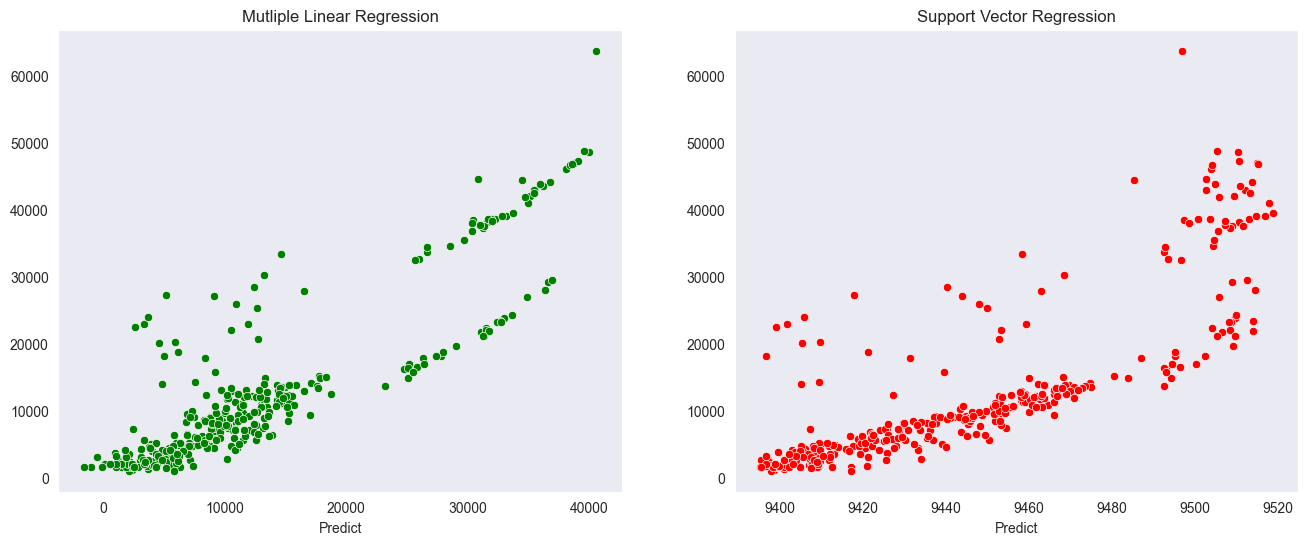

In [151]:
import seaborn as sns
# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.set_style('dark')
a = sns.scatterplot(x=y_pred2, y=y_test, ax=ax[0], color='green')
a.set_title('Mutliple Linear Regression')
a.set_xlabel('Predict')

# Set the style
sns.set_style('dark')
b = sns.scatterplot(x=y_pred, y=y_test, ax=ax[1], color='red')
b.set_title('Support Vector Regression')
b.set_xlabel('Predict')

# Show the plot
plt.show()
